In [1]:
import torch
import ast
import torch.nn as nn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

In [2]:
train_binding_df = pd.read_csv("data/development_set/full_grouped_train_binding_sites_df.csv")
test_binding_df = pd.read_csv("data/development_set/full_grouped_test_binding_sites_df.csv")

In [3]:
display(train_binding_df)

prot_id                                      binding_sites  \
0     A0A0F7RDM3                            [29, 53, 129, 135, 137]   
1     A0A0F7RHX8                    [67, 72, 76, 78, 123, 133, 135]   
2     A0A0H2W6Y8  [85, 119, 125, 126, 129, 144, 197, 198, 207, 2...   
3     A0A2B6C3P9                      [79, 111, 114, 117, 122, 125]   
4     A0A384LKY8  [5, 10, 12, 14, 43, 63, 72, 74, 76, 83, 85, 11...   
...          ...                                                ...   
1009      S0BAP9  [56, 66, 69, 70, 72, 73, 77, 80, 81, 86, 89, 9...   
1010      S3TFW2  [75, 79, 122, 192, 193, 204, 277, 278, 279, 28...   
1011      V6F235                                    [230, 232, 255]   
1012      V9P0A9  [13, 33, 34, 37, 38, 42, 49, 51, 70, 72, 74, 7...   
1013      W8VZW3  [61, 96, 98, 99, 102, 103, 106, 135, 139, 160,...   

             ligand_type                                           sequence  \
0              ['metal']  MEIRKKLVVPSKYGTKCPYTMKPKYITVHNTYNDAPAENEVNYMIT...   
1              ['small']  MHLKEKITTIIQGQRTGVLSTVRNDKPHSAFMMFFHEDFVLYVATD...   
2              ['metal']  MMKILGLIGGMSWESTIPYYRMINQHVKAQLGGLHSAKIILYSVDF...   
3              ['metal']  MSINKWLFRFIGFLVMLVVITTLNSLNVFASVNDLAQPIASAKVIE...   
4     ['metal', 'small']  MSEHFVGKYEVELKFRVMDLTTLHEQLVAQKATAFTLNNHEKDIYL...   
...                  ...                                                ...   
1009           ['small']  MNPLSTVLLVLCATSAALASEFCSEADATIVIKQWNQIYNAGIGAK...   
1010           ['small']  MTRPDSKSMNYQLLKTFSRQPIQFGRFLARLLAGLVNTLKITRTSK...   
1011           ['small']  MRKSGCAVCSRSIGWVGLAVSTVLMVMKAFVGLIGGSQAMLADAMY...   
1012           ['small']  MADFKFEPMRSLIYVDCVSEDYRPKLQRWIYKVHIPDSISQFEPYV...   
1013           ['small']  MKNIESLFDYSAGQFEFIDHLLTMGVGVHFAALIFFLVVSQFVAPK...   

      sequence_length                                      metal_binding  \
0                 234  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1                 138  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2                 231  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3                 129  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4                 179  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...   
...               ...                                                ...   
1009              168  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1010              327  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1011              318  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1012              283  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1013              272  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                          small_binding  \
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4     [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, ...   
...                                                 ...   
1009  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1010  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1011  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1012  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...   
1013  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                        nuclear_binding  \
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
...                                                 ...   
1009  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1010  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1011  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..

In [4]:
list_columns = ['any_ligand_binding_sites', 'metal_binding', 'small_binding', 'nuclear_binding']

for col in list_columns:
    test_binding_df[col] = test_binding_df[col].apply(ast.literal_eval)
    train_binding_df[col] = train_binding_df[col].apply(ast.literal_eval)

### Show distribution binding sites of amino acids

In [5]:
def analyze_amino_acid_binding(df, sequence_col, binding_cols):
    # Dictionary to store results
    aa_stats = {aa: {'binding': 0, 'non_binding': 0} for aa in 'ACDEFGHIKLMNPQRSTVWY'}
    
    # Process each protein
    for idx, row in df.iterrows():
        sequence = row[sequence_col]
        
        # Combine all binding sites
        combined_binding = np.zeros(len(sequence))
        for col in binding_cols:
            binding_array = row[col]
            print(f"Binding array: {binding_array}")
            # Ensure binding_array is the right length
            if len(binding_array) >= len(sequence):
                combined_binding = np.logical_or(combined_binding, binding_array[:len(sequence)])
        
        print(f"Combined binding sequence: {combined_binding}")

        # Count binding and non-binding for each amino acid
        for i, aa in enumerate(sequence):
            if aa in aa_stats:
                if i < len(combined_binding) and combined_binding[i]:
                    aa_stats[aa]['binding'] += 1
                else:
                    aa_stats[aa]['non_binding'] += 1
    
    print(f"Current amino acids counter dictonary: {aa_stats}")
    
    # Convert to DataFrame for easy plotting
    result = []
    for aa, counts in aa_stats.items():
        total = counts['binding'] + counts['non_binding']
        if total > 0:  # Avoid division by zero
            binding_percentage = counts['binding'] / total * 100
            result.append({
                'Amino Acid': aa,
                'Binding %': binding_percentage,
                'Non-binding %': 100 - binding_percentage,
                'Total Count': total
            })
    
    return pd.DataFrame(result)



### Test outputs before displaying distribution

In [6]:
binding_cols = ['any_ligand_binding_sites']
stats_df = analyze_amino_acid_binding(train_binding_df, 'sequence', binding_cols)

Binding array: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Combined binding sequence: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False False False

In [7]:
# Run the analysis
binding_cols = ['any_ligand_binding_sites']
train_stats_df = analyze_amino_acid_binding(train_binding_df, 'sequence', binding_cols)
test_stats_df = analyze_amino_acid_binding(test_binding_df, 'sequence', binding_cols)

# Sort by binding percentage for better visualization
train_stats_df = train_stats_df.sort_values('Binding %', ascending=False)
test_stats_df = test_stats_df.sort_values('Binding %', ascending=False)

def show_amino_acid_stats(stats_df):
    # Create a stacked bar chart
    plt.figure(figsize=(12, 8))
    sns.set_style("whitegrid")

    # Create the plot
    # ax = sns.barplot(x='Amino Acid', y='Total Count', data=stats_df, alpha=0.3, color='lightgrey')

    # # Add binding percentage bars
    # binding_bars = sns.barplot(x='Amino Acid', y = stats_df['Total Count'] * stats_df['Non-binding %'] / 100, 
    #                         data=stats_df, color='darkblue', label='Non-Binding')

    # # Add annotations
    # for i, row in enumerate(stats_df.itertuples()):
    #     plt.text(i, 5, f"{row._3:.1f}%", ha='center', color='white', fontweight='bold')

    # # Add a legend and labels
    # plt.legend(loc='upper right')
    # plt.xlabel('Amino Acid', fontsize=12)
    # plt.ylabel('Count', fontsize=12)
    # plt.title('Distribution of Binding vs Non-binding Sites by Amino Acid', fontsize=14)

    # # Add a second y-axis for percentages
    # ax2 = ax.twinx()
    # ax2.set_ylabel('Non-Binding Percentage (%)', fontsize=12)
    # ax2.set_ylim(0, 100)

    # plt.tight_layout()
    # plt.show()

    # For more detailed analysis, you can also create a heatmap showing binding preferences
    # Reshape the data for a heatmap
    heatmap_data = stats_df.set_index('Amino Acid')[['Binding %']]

    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data.T, annot=True, cmap='Oranges', fmt='.1f', cbar_kws={'label': 'Binding %'})
    plt.title('Binding Site Percentage by Amino Acid')
    plt.tight_layout()
    plt.show()


Binding array: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Combined binding sequence: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False False False

<Figure size 1200x800 with 0 Axes>

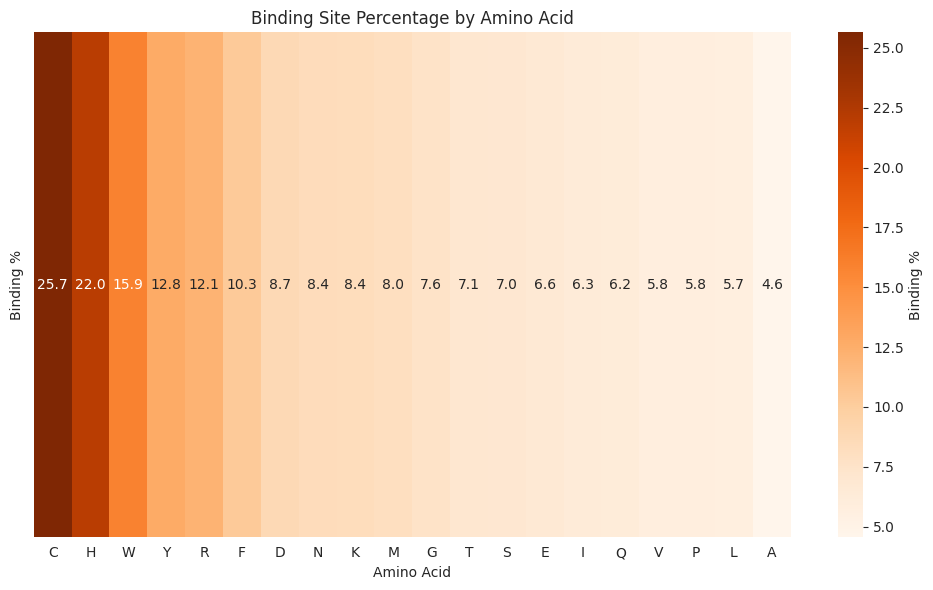

In [8]:
show_amino_acid_stats(train_stats_df)

<Figure size 1200x800 with 0 Axes>

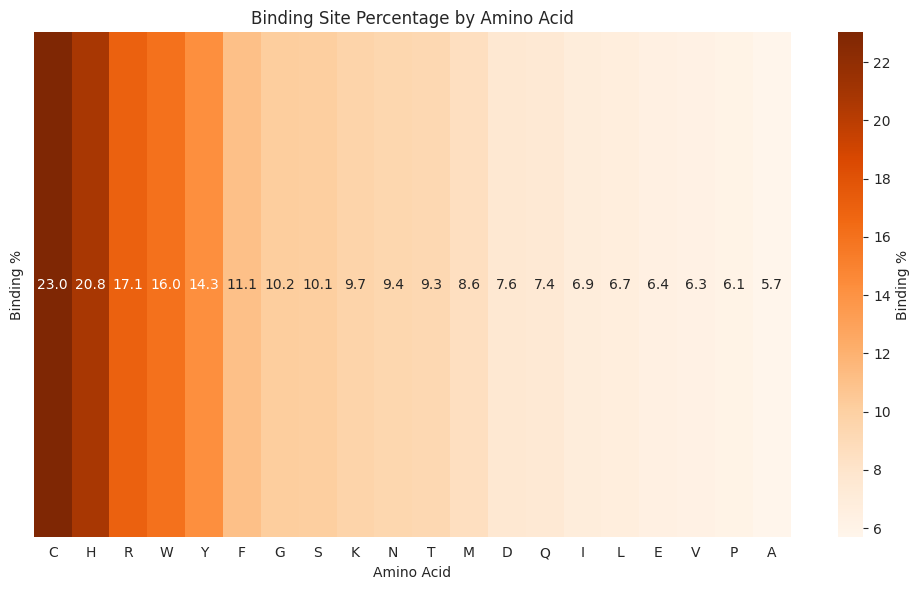

In [9]:
show_amino_acid_stats(test_stats_df)

### Analyze predictions with ground-truth labels

In [10]:
preds_df = pd.read_csv("data/development_set/test_binding_df_with_prediction.csv")

In [11]:
preds_stats_df = analyze_amino_acid_binding(preds_df, sequence_col = 'test_sequences', binding_cols = ['predctions'])
display(preds_stats_df)

Binding array: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Combined binding sequence: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  

Amino Acid  Binding %  Non-binding %  Total Count
0           A      100.0            0.0         4894
1           C      100.0            0.0          999
2           D      100.0            0.0         3444
3           E      100.0            0.0         4334
4           F      100.0            0.0         2562
5           G      100.0            0.0         4152
6           H      100.0            0.0         1714
7           I      100.0            0.0         3655
8           K      100.0            0.0         3747
9           L      100.0            0.0         5719
10          M      100.0            0.0         1746
11          N      100.0            0.0         2728
12          P      100.0            0.0         2907
13          Q      100.0            0.0         2402
14          R      100.0            0.0         3513
15          S      100.0            0.0         3781
16          T      100.0            0.0         3203
17          V      100.0            0.0         4105
18          W      100.0            0.0          967
19          Y      100.0            0.0         2117

### RSA values analysis

In [12]:
from features_extraction import compute_rsa, get_structure
from tqdm import tqdm

def create_rsa_labels_df(df):
    all_rsa_values = []
    all_labels = []

    for idx, row in tqdm(df.iterrows(), total=len(df)):
        labels = row['any_ligand_binding_sites']
        protein_id = row['prot_id']
        pdb_file = f"data/esmFold_pdb_files/{protein_id}.pdb"
        # protein_structure = get_structure(protein_id, pdb_file)
        rsa_values_list = compute_rsa(pdb_file)
        rsa_values = [value[2] for value in rsa_values_list]
        # Ensure the length of rsa_values matches the length of the labels
        if len(rsa_values) > len(labels):
            rsa_values = rsa_values[:len(labels)]
        elif len(rsa_values) < len(labels):
            labels = labels[:len(rsa_values)]
        all_rsa_values.extend(rsa_values)
        all_labels.extend(labels)

    # Create a DataFrame for RSA values and labels
    rsa_df = pd.DataFrame({
        'RSA': all_rsa_values,
        'Label': all_labels
    })
    
    return rsa_df

Prot ID: E0TY72


/home/khoa/miniconda3/envs/protein-embed/lib/python3.9/site-packages/mdtraj/formats/pdb/pdbfile.py:208: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn(


Number of residues: 194
rsa_tensor shape: torch.Size([194, 1])
RSA values: tensor([[7.5802e-03],
        [8.4483e-03],
        [5.3557e-03],
        [3.4557e-03],
        [5.2117e-03],
        [7.8035e-04],
        [4.1662e-03],
        [4.2647e-03],
        [1.8643e-03],
        [3.3489e-04],
        [2.6893e-03],
        [3.0261e-03],
        [8.7973e-04],
        [8.1360e-05],
        [5.2348e-03],
        [6.7605e-03],
        [1.5091e-03],
        [6.5533e-04],
        [1.9602e-03],
        [6.5330e-03],
        [3.6176e-03],
        [1.6144e-03],
        [1.3948e-03],
        [7.2296e-06],
        [1.6996e-05],
        [2.8915e-05],
        [1.7304e-04],
        [1.2414e-03],
        [2.7903e-04],
        [8.3460e-04],
        [2.3236e-03],
        [1.0953e-05],
        [4.8272e-03],
        [1.1083e-03],
        [7.3136e-06],
        [1.8554e-03],
        [1.1036e-03],
        [6.8843e-05],
        [0.0000e+00],
        [4.2920e-03],
        [1.7701e-03],
        [0.0000e+00],
 

In [13]:
initial_train_df = pd.read_csv("data/development_set/full_grouped_train_binding_sites_df.csv")
initial_train_df['binding_sites'] = initial_train_df['binding_sites'].apply(ast.literal_eval)
initial_train_df['any_ligand_binding_sites'] = initial_train_df['any_ligand_binding_sites'].apply(ast.literal_eval)

test_df = pd.read_csv("data/development_set/full_grouped_test_binding_sites_df.csv")
test_df['binding_sites'] = test_df['binding_sites'].apply(ast.literal_eval)
test_df['any_ligand_binding_sites'] = test_df['any_ligand_binding_sites'].apply(ast.literal_eval)

excluded_protein_id = ['Q9NZV6']
train_df = initial_train_df[~initial_train_df['prot_id'].isin(excluded_protein_id)]

In [14]:
train_rsa_labels_df = create_rsa_labels_df(train_df)
test_rsa_labels_df = create_rsa_labels_df(test_df)

100%|██████████| 300/300 [01:07<00:00,  4.43it/s]



### Analyze the relationship between RSA values and labels

In [19]:
def analyze_rsa_vs_labels(rsa_df, set_name):
    # Group by label and calculate statistics for RSA values
    grouped = rsa_df.groupby('Label')['RSA'].describe()
    print(grouped)

    # Plot the distribution of RSA values for each label
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Label', y='RSA', data=rsa_df, palette="Set2")
    plt.title(f"RSA Value Distribution by Label in {set_name}")
    plt.xlabel("Label")
    plt.ylabel("RSA Value")
    plt.show()

    # Plot the density of RSA values for each label
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=rsa_df, x='RSA', hue='Label', fill=True, common_norm=False, palette="Set2")
    plt.title(f"Density Plot of RSA Values by Label in {set_name}")
    plt.xlabel("RSA Value")
    plt.ylabel("Density")
    plt.show()

    return grouped

         count      mean       std  min       25%       50%       75%  \
Label                                                                   
0      56820.0  0.003068  0.002457  0.0  0.000721  0.002837  0.004952   
1       5869.0  0.002819  0.002161  0.0  0.000955  0.002396  0.004343   

            max  
Label            
0      0.012032  
1      0.011822  


/tmp/ipykernel_60354/913440747.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y='RSA', data=rsa_df, palette="Set2")


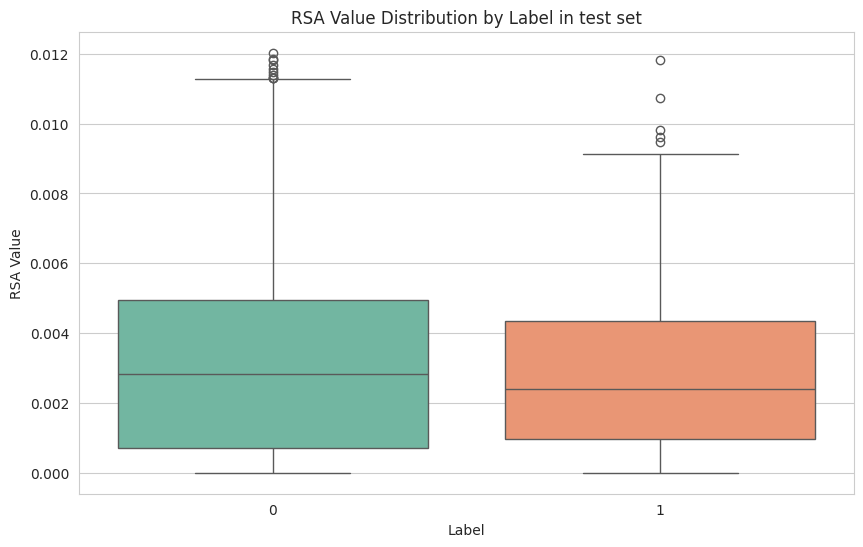

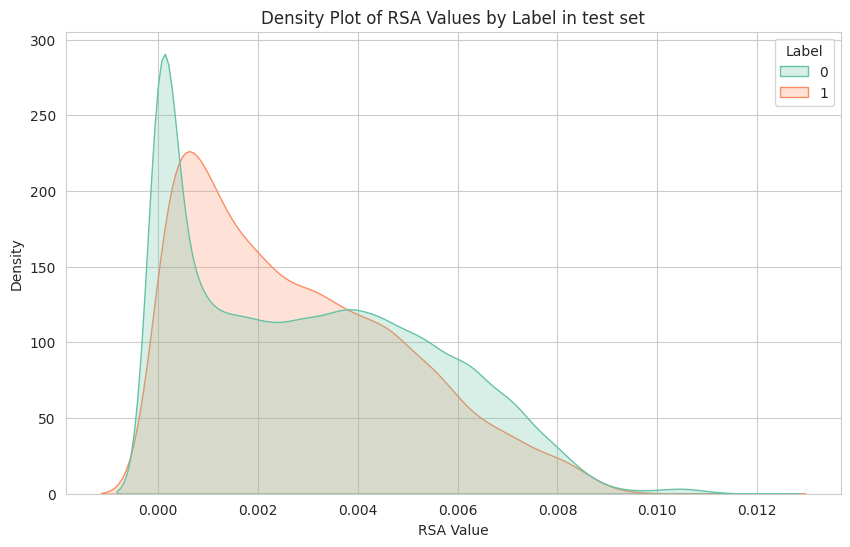

In [20]:
# Analyze the relationship between RSA values and labels
test_rsa_stats = analyze_rsa_vs_labels(test_rsa_labels_df, "test set")

          count      mean       std  min       25%       50%       75%  \
Label                                                                    
0      156574.0  0.003479  0.002504  0.0  0.001181  0.003415  0.005436   
1       13994.0  0.002930  0.002179  0.0  0.001009  0.002574  0.004531   

            max  
Label            
0      0.012351  
1      0.012494  


/tmp/ipykernel_60354/913440747.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y='RSA', data=rsa_df, palette="Set2")


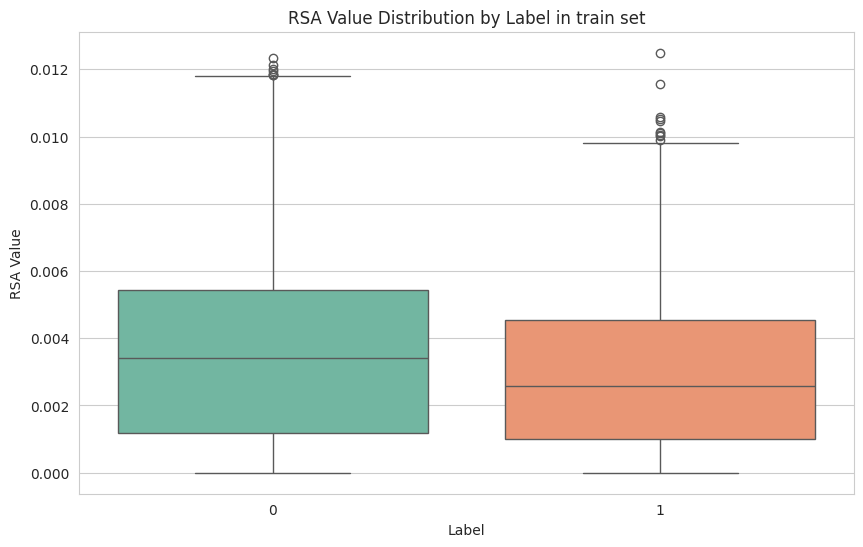

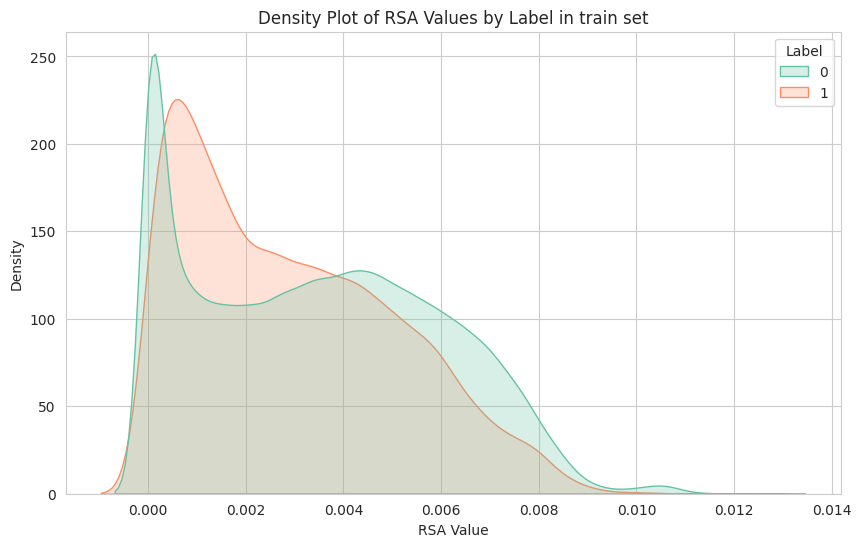

In [21]:
train_rsa_stats = analyze_rsa_vs_labels(train_rsa_labels_df, "train set")